# Regression Analysis on the California Housing Dataset (Tensorflow)

#### Library import

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

#### Dataset import

In [123]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing(as_frame=True)

#### Dataset visualization

In [124]:
df.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [125]:
df.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

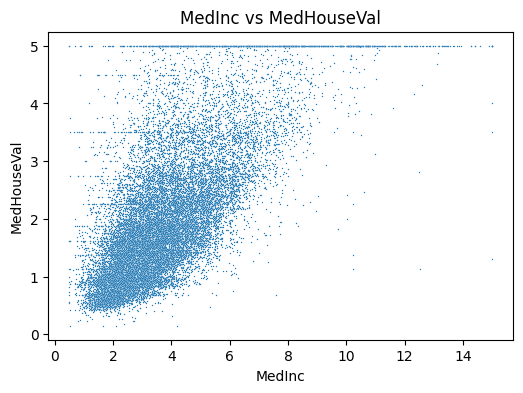

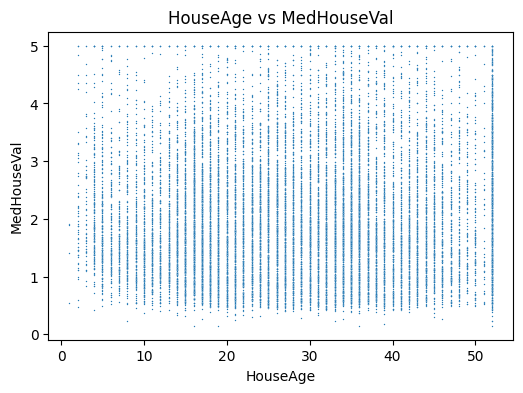

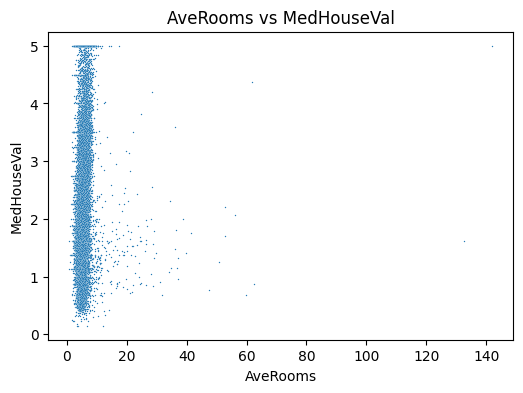

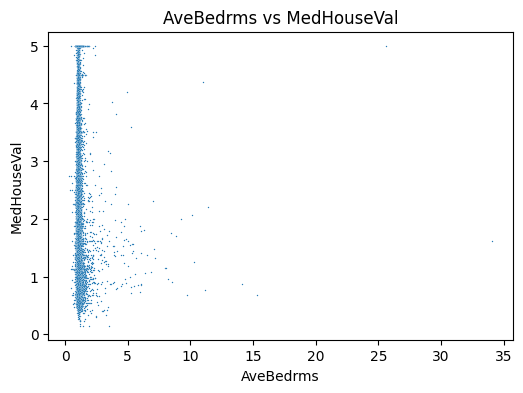

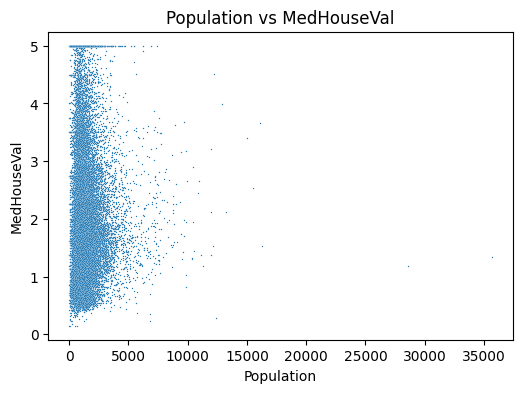

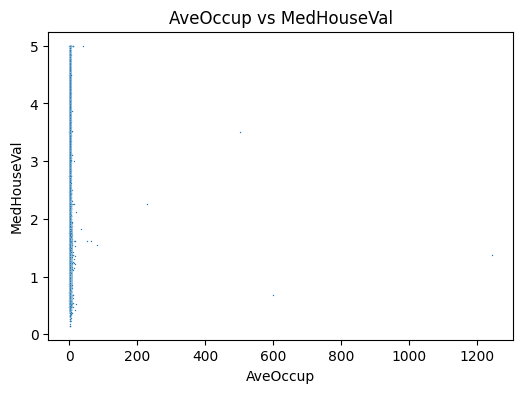

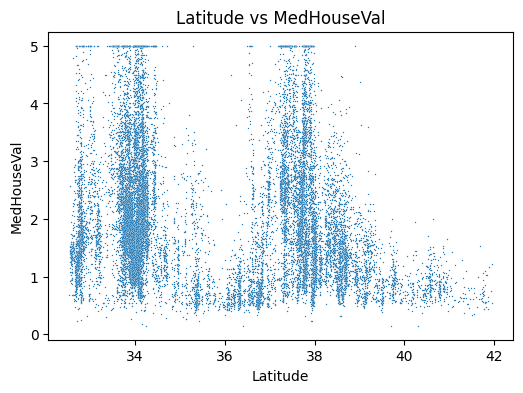

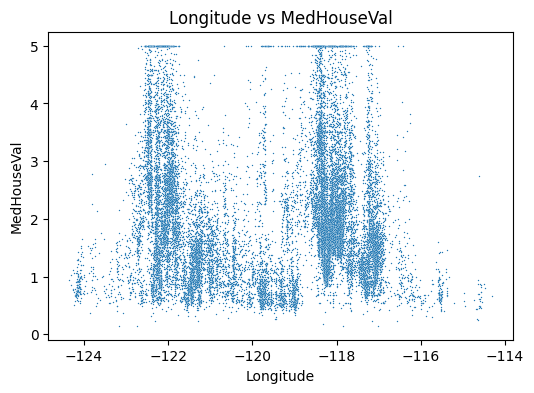

In [126]:
dataset = df.data
dataset["MedHouseVal"] = df.target

for feature in dataset.columns[:-1]:  # todas menos la columna Target
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=dataset, x=feature, y="MedHouseVal", s=1)
    plt.title(f'{feature} vs MedHouseVal')
    plt.show()

#### Data preparation and train-test split

In [127]:
X = df.data.values
y = df.target.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

#### Feature and target scaling

In [128]:
scaler_x = StandardScaler()
X_train_norm = scaler_x.fit_transform(X_train)

scaler_y = StandardScaler()
y_train_norm = scaler_y.fit_transform(y_train)

#### Neural Network model definition and training

In [145]:
model = Sequential([
    Dense(units=16, activation='relu'),
    Dense(units=8, activation='relu'),
    Dense(units=1, activation='linear'),
])

model.compile(
    loss = 'mse',
    optimizer=tf.optimizers.Adam(0.001),
)

model.fit(X_train_norm, y_train_norm, epochs=6, batch_size=8)

Epoch 1/6
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 2s 580us/step - loss: 0.1628
Epoch 2/6
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - loss: 0.0050
Epoch 3/6
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - loss: 0.0017
Epoch 4/6
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 1s 576us/step - loss: 0.0033
Epoch 5/6
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - loss: 0.0018
Epoch 6/6
2064/2064 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step - loss: 5.3919e-04


#### Model Prediction and inverse scaling

In [146]:
y_pred_norm = model.predict(scaler_x.transform(X_test))
y_pred = scaler_y.inverse_transform(y_pred_norm)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step


#### Feature-wise comparison: actual vs predicted

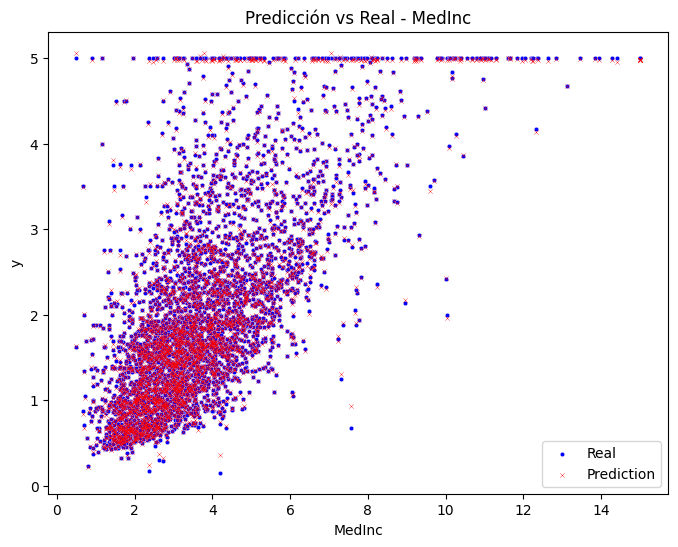

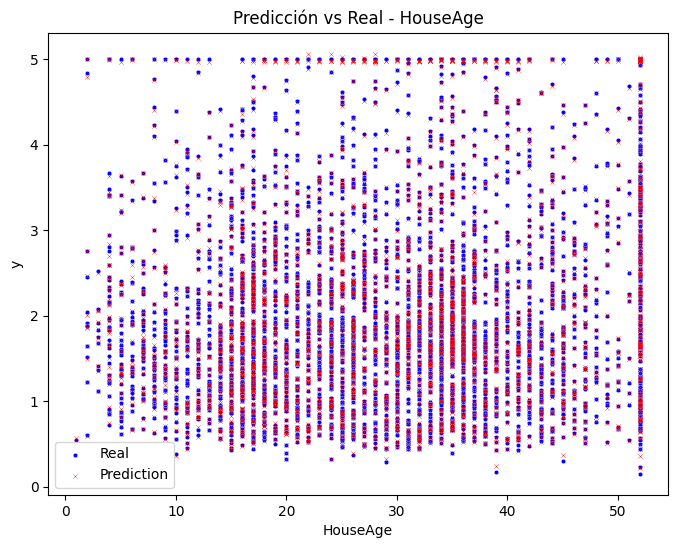

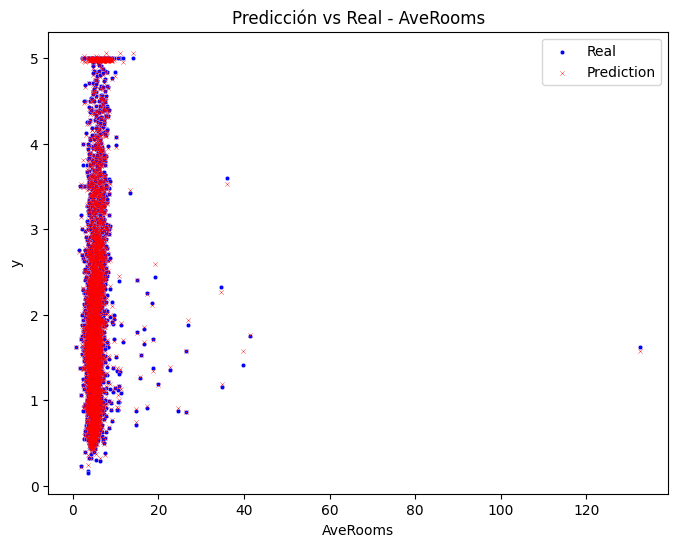

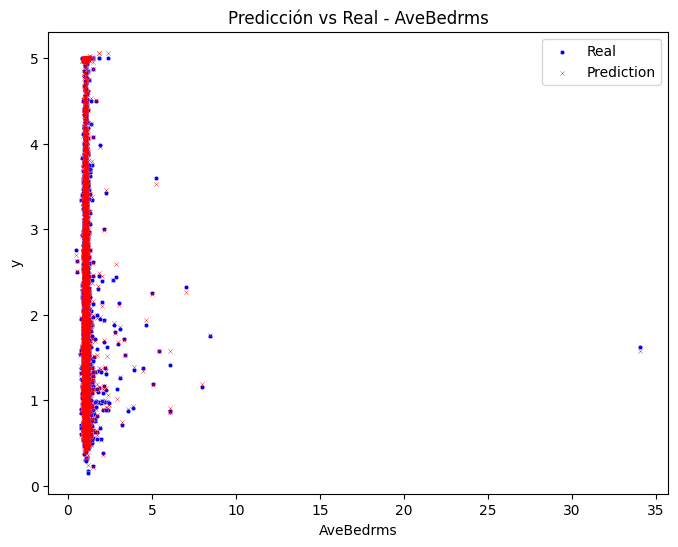

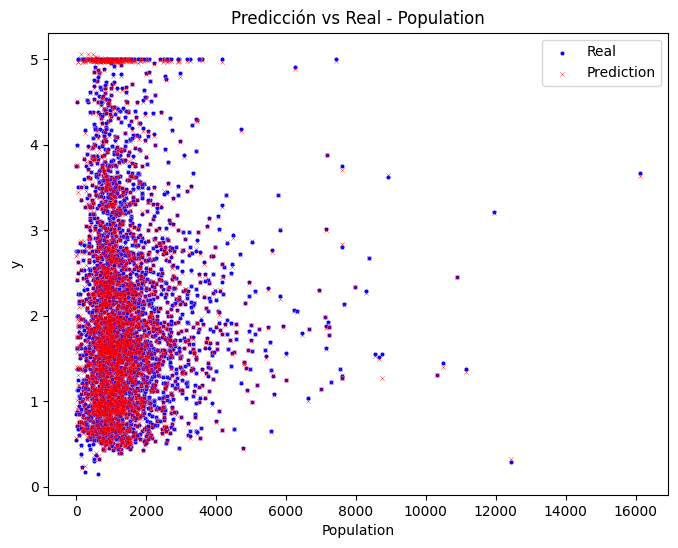

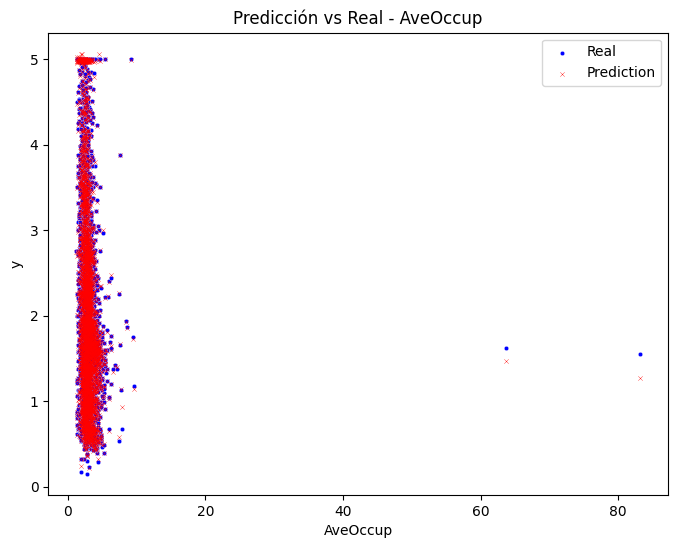

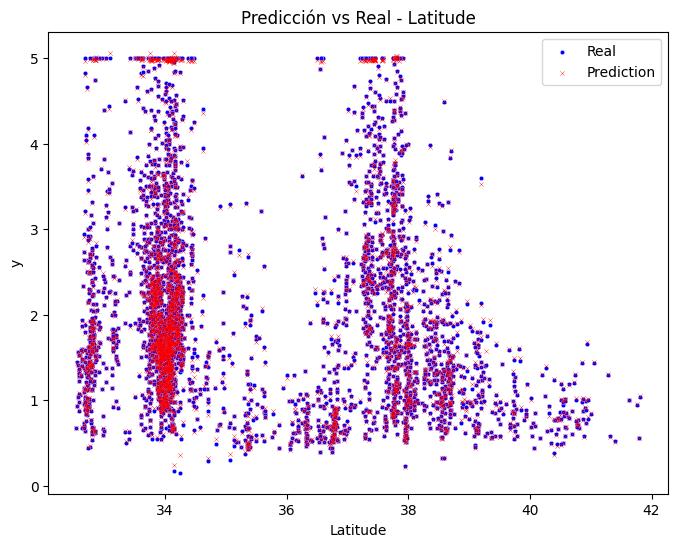

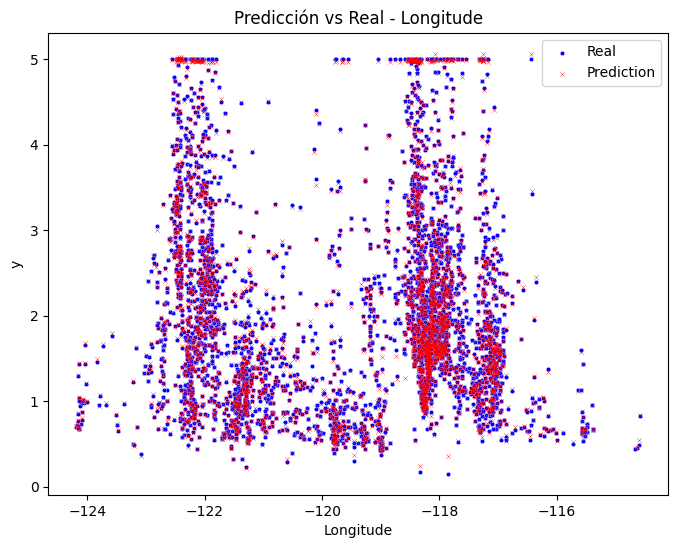

In [147]:
feature_names = df.data.columns

for i in range(n_features - 1):
    df_plot = pd.DataFrame({
        'X_feature': X_test[:, i],
        'y_test': y_test.flatten(),
        'y_pred': y_pred.flatten()
    })
    
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='X_feature', y='y_test', data=df_plot, label='Real', color='blue', s=10)
    sns.scatterplot(x='X_feature', y='y_pred', data=df_plot, label='Prediction', color='red', s=10, marker='x')
    plt.xlabel(feature_names[i])
    plt.ylabel('y')
    plt.title(f'Predicción vs Real - {feature_names[i]}')
    plt.legend()
    plt.show()

#### Prediction accuracy visualization

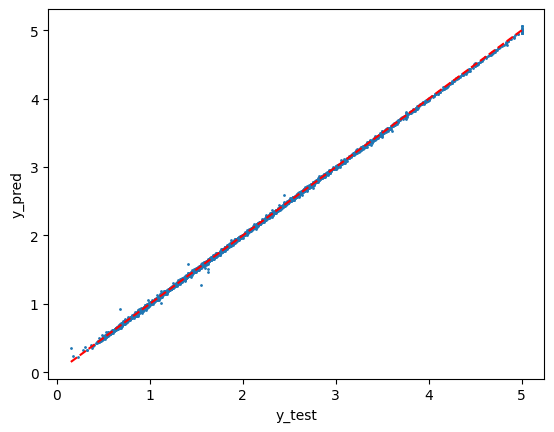

In [157]:
plt.scatter(y_test, y_pred, s=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()